In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
import csv

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from threading import Timer
from timeit import default_timer as timer
from IPython.display import clear_output

In [3]:
start = timer()
prep_dataset1 = pd.read_csv('../datasets/dataset_test_02_07.csv', delimiter=",")

df = prep_dataset1.iloc[:,1:4]


In [4]:
WINDOW = 35

for i in np.arange(df.shape[0]):    
    init = i*WINDOW
    init2 = (i+1)*WINDOW
    if(init2<df.shape[0]):
        df.iloc[init:init+WINDOW,2] =  df.iloc[init2,2]


In [5]:

df

,temperature,label,delay
0,19.3024,1,126.251634
1,19.1652,1,126.251634
2,19175.0000,1,126.251634
3,19.1456,1,126.251634
4,19.1652,1,126.251634
...,...,...,...
4895,19.5768,0,420.416429
4896,19.5866,0,420.416429
4897,19567.0000,0,420.416429
4898,19.5572,0,420.416429


In [6]:
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]

In [7]:
test

,temperature,label,delay
3920,17.5678,0,1121.053927
3921,17.5776,0,1121.053927
3922,17.5776,0,1121.053927
3923,17.5776,0,1121.053927
3924,17.5776,0,1121.053927
...,...,...,...
4895,19.5768,0,420.416429
4896,19.5866,0,420.416429
4897,19567.0000,0,420.416429
4898,19.5572,0,420.416429


In [8]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []    
    for i in range(len(X) - time_steps):
        clear_output(wait=True)
        print('modeling to keras ',round((i/(len(X) - time_steps))*100,2), ('%'), end='')
        s = round(timer() - start)
        if(s>60):
            s /=60
            print(' ', s, ' seconds')
        v = X.iloc[i: (i+time_steps), 2:3].to_numpy()
        Xs.append(v)
        ys.append(y.iloc[i+time_steps])
    return np.array(Xs), np.array(ys)

In [9]:
def LSTMconf(X_train):
    print('Init config LSTM')
    model = keras.Sequential()
    model.add(
            keras.layers.LSTM(
                 activation="relu",
                units=64,
                input_shape=(X_train.shape[1],X_train.shape[2])
            )
    )
#      model.add(
#             keras.layers.LSTM(
#                  activation="relu",
#                 units=64,
#                 input_shape=(X_train.shape[1],X_train.shape[2])
#             )
#     )
    model.add(keras.layers.Dense(units=128, activation="relu"))
    model.add(keras.layers.Dropout(rate=0.75))
    model.add(keras.layers.Dense(units=128, activation="relu"))
    model.add(keras.layers.Dense(units=1))
    
    loss ="mse"
    optim = tf.keras.optimizers.Adam(
    learning_rate=0.0001)
    

    model.compile(loss=loss, optimizer=optim, 
#              metrics=metrics
             )
    return model
    

In [10]:
def LSTMfit(model,X_train,Y_train):
    print('Init Train')
    start = timer()
    history = model.fit(
        X_train, Y_train, 
        epochs=256, 
        batch_size= 128,
        validation_split=0.1,
        shuffle=False,
    #     callbacks=[tensorboard_callback]
    )
    return history


In [11]:

X_train,Y_train = create_dataset(train, train.delay)
model = LSTMconf(X_train)
history = LSTMfit(model,X_train, Y_train)


modeling to keras  99.97 %Init config LSTM
Init Train
Epoch 1/256
28/28 [==============================] - 6s 34ms/step - loss: 28791094.0000 - val_loss: 13914.7236
Epoch 2/256
28/28 [==============================] - 0s 8ms/step - loss: 27502686.0000 - val_loss: 13284.5830
Epoch 3/256
28/28 [==============================] - 0s 7ms/step - loss: 26203974.0000 - val_loss: 12631.7783
Epoch 4/256
28/28 [==============================] - 0s 8ms/step - loss: 24647320.0000 - val_loss: 11867.4014
Epoch 5/256
28/28 [==============================] - 0s 6ms/step - loss: 22712332.0000 - val_loss: 10951.4199
Epoch 6/256
28/28 [==============================] - 0s 6ms/step - loss: 20795844.0000 - val_loss: 9888.5146
Epoch 7/256
28/28 [==============================] - 0s 6ms/step - loss: 18231802.0000 - val_loss: 8645.6865
Epoch 8/256
28/28 [==============================] - 0s 6ms/step - loss: 15208238.0000 - val_loss: 7126.2603
Epoch 9/256
28/28 [==============================] - 0s 7ms/step - l

28/28 [==============================] - 0s 7ms/step - loss: 1007469.0625 - val_loss: 168.8153
Epoch 77/256
28/28 [==============================] - 0s 6ms/step - loss: 1026822.7500 - val_loss: 142.5452
Epoch 78/256
28/28 [==============================] - 0s 6ms/step - loss: 1037899.0625 - val_loss: 178.9064
Epoch 79/256
28/28 [==============================] - 0s 5ms/step - loss: 989756.6250 - val_loss: 154.8191
Epoch 80/256
28/28 [==============================] - 0s 6ms/step - loss: 1061501.2500 - val_loss: 209.6654
Epoch 81/256
28/28 [==============================] - 0s 6ms/step - loss: 977528.2500 - val_loss: 204.7365
Epoch 82/256
28/28 [==============================] - 0s 6ms/step - loss: 1081465.7500 - val_loss: 162.8822
Epoch 83/256
28/28 [==============================] - 0s 6ms/step - loss: 975641.6875 - val_loss: 152.5007
Epoch 84/256
28/28 [==============================] - 0s 6ms/step - loss: 1007552.5000 - val_loss: 218.0340
Epoch 85/256
28/28 [========================

28/28 [==============================] - 0s 6ms/step - loss: 615107.3750 - val_loss: 2524.8784
Epoch 152/256
28/28 [==============================] - 0s 6ms/step - loss: 621395.8125 - val_loss: 2902.1948
Epoch 153/256
28/28 [==============================] - 0s 6ms/step - loss: 589913.5625 - val_loss: 2757.6448
Epoch 154/256
28/28 [==============================] - 0s 6ms/step - loss: 577024.5000 - val_loss: 3073.9299
Epoch 155/256
28/28 [==============================] - 0s 7ms/step - loss: 574039.3750 - val_loss: 3058.1709
Epoch 156/256
28/28 [==============================] - 0s 7ms/step - loss: 552451.4375 - val_loss: 3308.4082
Epoch 157/256
28/28 [==============================] - 0s 7ms/step - loss: 550865.8125 - val_loss: 3073.3086
Epoch 158/256
28/28 [==============================] - 0s 6ms/step - loss: 621512.3750 - val_loss: 3708.9351
Epoch 159/256
28/28 [==============================] - 0s 6ms/step - loss: 614576.8750 - val_loss: 3282.8093
Epoch 160/256
28/28 [============

28/28 [==============================] - 0s 5ms/step - loss: 318606.5938 - val_loss: 9445.6943
Epoch 227/256
28/28 [==============================] - 0s 5ms/step - loss: 311053.3125 - val_loss: 9545.2666
Epoch 228/256
28/28 [==============================] - 0s 5ms/step - loss: 302031.0938 - val_loss: 9483.5732
Epoch 229/256
28/28 [==============================] - 0s 5ms/step - loss: 313469.2812 - val_loss: 9739.8467
Epoch 230/256
28/28 [==============================] - 0s 5ms/step - loss: 307870.5938 - val_loss: 9607.3037
Epoch 231/256
28/28 [==============================] - 0s 5ms/step - loss: 293630.3125 - val_loss: 9804.3301
Epoch 232/256
28/28 [==============================] - 0s 5ms/step - loss: 313023.3750 - val_loss: 9808.9951
Epoch 233/256
28/28 [==============================] - 0s 5ms/step - loss: 286957.0625 - val_loss: 9821.1650
Epoch 234/256
28/28 [==============================] - 0s 5ms/step - loss: 295881.2812 - val_loss: 9802.3467
Epoch 235/256
28/28 [============

In [12]:
Y_train.shape

(3919,)

In [13]:
print('Saving Model')
model.save('models/lstm_mininet')

Saving Model
INFO:tensorflow:Assets written to: models/lstm_mininet\assets


# loss training

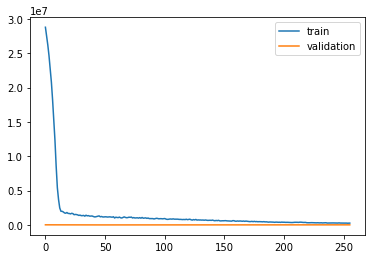

In [14]:

fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
ax1.plot(history.history['loss'], label='train')
ax1.plot(history.history['val_loss'], label='validation')
ax1.legend();

In [15]:
X_test,Y_test = create_dataset(test, test.delay)

modeling to keras  99.9 %  1.2833333333333334  seconds


In [16]:
Y_test

array([1121.05392718, 1121.05392718, 1121.05392718, 1121.05392718,
       1121.05392718, 1121.05392718, 1121.05392718, 1121.05392718,
       1121.05392718, 1121.05392718, 1121.05392718, 1121.05392718,
       1121.05392718, 1121.05392718, 1121.05392718, 1121.05392718,
       1121.05392718, 1121.05392718, 1121.05392718, 1121.05392718,
       1121.05392718, 1121.05392718, 1121.05392718, 1121.05392718,
       1121.05392718, 1121.05392718, 1121.05392718, 1121.05392718,
       1121.05392718, 1121.05392718, 1121.05392718, 1121.05392718,
       1121.05392718, 1121.05392718,  140.13705254,  140.13705254,
        140.13705254,  140.13705254,  140.13705254,  140.13705254,
        140.13705254,  140.13705254,  140.13705254,  140.13705254,
        140.13705254,  140.13705254,  140.13705254,  140.13705254,
        140.13705254,  140.13705254,  140.13705254,  140.13705254,
        140.13705254,  140.13705254,  140.13705254,  140.13705254,
        140.13705254,  140.13705254,  140.13705254,  140.13705

# predicting

In [17]:
y_pred = model.predict(X_test)

# unormalizing

In [18]:
y_pred

array([[141.75188 ],
       [141.75188 ],
       [141.75188 ],
       [141.75188 ],
       [141.75188 ],
       [141.75188 ],
       [141.75188 ],
       [141.75188 ],
       [141.75188 ],
       [141.75188 ],
       [141.75188 ],
       [141.75188 ],
       [141.75188 ],
       [141.75188 ],
       [141.75188 ],
       [141.75188 ],
       [141.75188 ],
       [141.75188 ],
       [141.75188 ],
       [141.75188 ],
       [141.75188 ],
       [141.75188 ],
       [141.75188 ],
       [141.75188 ],
       [141.75188 ],
       [141.75188 ],
       [141.75188 ],
       [141.75188 ],
       [141.75188 ],
       [141.75188 ],
       [141.75185 ],
       [141.75185 ],
       [141.75188 ],
       [141.75188 ],
       [141.75188 ],
       [ 19.030756],
       [ 19.030756],
       [ 19.030756],
       [ 19.030756],
       [ 19.030756],
       [ 19.030756],
       [ 19.030756],
       [ 19.030756],
       [ 19.030756],
       [ 19.030756],
       [ 19.030756],
       [ 19.030756],
       [ 19.0

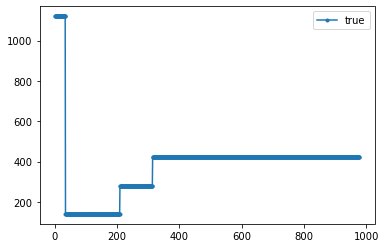

In [19]:
fig2 = plt.figure()
a2 = fig2.add_subplot(1,1,1)
a2.plot(Y_test, marker='.', label='true')
a2.legend();

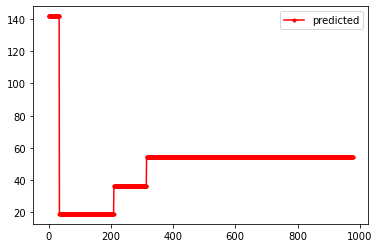

In [20]:
fig3 = plt.figure()
a3 = fig3.add_subplot(1,1,1)
a3.plot(y_pred,'r',marker='.', label='predicted')
a3.legend();

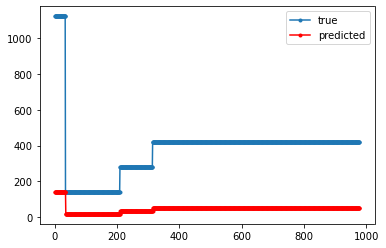

In [21]:
fig4 = plt.figure()
a4 = fig4.add_subplot(1,1,1)

a4.plot(Y_test, marker='.', label='true')
a4.plot(y_pred,'r',marker='.', label='predicted')
a4.legend();

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import explained_variance_score

In [23]:
size = np.min([y_pred.shape[0],Y_test.shape[0] ])
rmse =  mean_squared_error(Y_test[0:size], y_pred[0:size], squared=False)
mae =  mean_absolute_error(Y_test[0:size], y_pred[0:size])
median_mae = median_absolute_error(Y_test[0:size], y_pred[0:size])
evs = explained_variance_score(Y_test[0:size], y_pred[0:size])

print(rmse)
print(mae)
print(median_mae)
print('Explained Variance Score: ',evs)

365.24699333695025
330.4662212831129
366.22476720809937
Explained Variance Score:  0.232551325814646


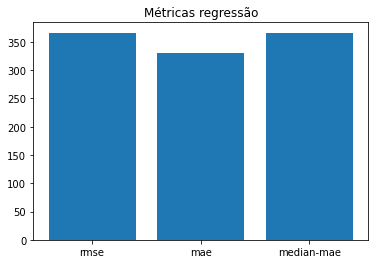

In [24]:
objects = ('rmse', 'mae', 'median-mae')
y_pos = np.arange(3)
performance = [rmse,mae,median_mae]

plt.bar(y_pos, performance, align='center')
plt.xticks(y_pos, objects)
#plt.ylabel('Usage')
plt.title('Métricas regressão')

plt.show()

In [25]:
Y_test[0:size]

array([1121.05392718, 1121.05392718, 1121.05392718, 1121.05392718,
       1121.05392718, 1121.05392718, 1121.05392718, 1121.05392718,
       1121.05392718, 1121.05392718, 1121.05392718, 1121.05392718,
       1121.05392718, 1121.05392718, 1121.05392718, 1121.05392718,
       1121.05392718, 1121.05392718, 1121.05392718, 1121.05392718,
       1121.05392718, 1121.05392718, 1121.05392718, 1121.05392718,
       1121.05392718, 1121.05392718, 1121.05392718, 1121.05392718,
       1121.05392718, 1121.05392718, 1121.05392718, 1121.05392718,
       1121.05392718, 1121.05392718,  140.13705254,  140.13705254,
        140.13705254,  140.13705254,  140.13705254,  140.13705254,
        140.13705254,  140.13705254,  140.13705254,  140.13705254,
        140.13705254,  140.13705254,  140.13705254,  140.13705254,
        140.13705254,  140.13705254,  140.13705254,  140.13705254,
        140.13705254,  140.13705254,  140.13705254,  140.13705254,
        140.13705254,  140.13705254,  140.13705254,  140.13705